In [6]:
!git clone https://github.com/google-research/timesfm.git

# Step 2: Navigate into the repository
%cd /content/timesfm

# Step 3: Checkout the specific commit
!git checkout 764db576f9cee2d8be502ab40f8552c378f3d18a
!pip install -e .

Cloning into 'timesfm'...
remote: Enumerating objects: 589, done.
remote: Counting objects: 100% (587/587), done.
remote: Compressing objects: 100% (300/300), done.
remote: Total 589 (delta 308), reused 496 (delta 258), pack-reused 2 (from 1)
Receiving objects: 100% (589/589), 1.80 MiB | 12.28 MiB/s, done.
Resolving deltas: 100% (308/308), done.
/content/timesfm
Note: switching to '764db576f9cee2d8be502ab40f8552c378f3d18a'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 764db57 Update README.md
Obtaining file:

In [1]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=6b6c03c324559ff716efcb426663e4714746ffaa07f4598010b152c37802779e
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [ ]:
import os
import time
import timesfm
from collections import defaultdict
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error


2024-09-21 10:33:38.421819: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Load TimesFM model
timesfm_backend = "gpu"  # or 'cpu'
from jax._src import config
config.update("jax_platforms", {"cpu": "cpu", "gpu": "cuda", "tpu": ""}[timesfm_backend])

In [5]:
import pandas as pd
import ta
from sklearn.preprocessing import MinMaxScaler

start_date = "2022-10-12"
end_date = "2024-01-01"
analysis_start_date = "2023-01-01"  # تاریخ شروع مورد نظر

# دانلود داده‌های سهام از فایل
df = pd.read_csv('/content/خودرو.csv')

# Ensure the 'date' column is parsed as datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Filter the DataFrame by the date range
data = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
data.dropna(inplace=True)
# Set 'date' column as index and ensure it's datetime
data.set_index('date', inplace=True)

# محاسبه میانگین‌های متحرک و اندیکاتورهای تکنیکال
data['moving_avg_10'] = data['close'].rolling(window=10).mean()
data['moving_avg_50'] = data['close'].rolling(window=50).mean()
data['rsi'] = ta.momentum.RSIIndicator(data['close'], window=14).rsi()
data['ema'] = ta.trend.EMAIndicator(data['close'], window=10).ema_indicator()



# فیلتر کردن داده‌ها از تاریخ شروع مورد نظر
analysis_start_date = pd.to_datetime(analysis_start_date)  # Convert to datetime
data = data[data.index >= analysis_start_date]

# حذف سطرهایی که دارای مقادیر NaN هستند (به دلیل محاسبات میانگین‌های متحرک)
data.dropna(inplace=True)
# تنظیم DataFrame نهایی
df_final = data[['close', 'volume', 'moving_avg_10', 'moving_avg_50', 'rsi', 'ema']].reset_index()
df_final.columns = ['date', 'close', 'volume', 'moving_avg_10', 'moving_avg_50', 'rsi', 'ema']
df_final['date'] = pd.to_datetime(df_final['date'])
df_final.set_index('date', inplace=True)

# نمایش داده‌ها
df=df_final
df

/tmp/ipykernel_2222/1471406813.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
/tmp/ipykernel_2222/1471406813.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['moving_avg_10'] = data['close'].rolling(window=10).mean()
/tmp/ipykernel_2222/1471406813.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

,close,volume,moving_avg_10,moving_avg_50,rsi,ema
date,,,,,,
2023-01-01,2950.0,1345500753,2681.5,2332.68,75.355262,2735.346508
2023-01-02,3080.0,579189542,2731.1,2356.42,78.950429,2798.010779
2023-01-03,3170.0,2127828444,2798.7,2382.48,81.015254,2865.645183
2023-01-04,3330.0,1022535786,2878.5,2412.36,84.016923,2950.073332
2023-01-07,3412.0,1250800861,2970.6,2444.80,85.299731,3034.059999
...,...,...,...,...,...,...
2023-12-26,2718.0,168546657,2777.6,2630.86,48.497521,2767.600447
2023-12-27,2732.0,166270066,2772.4,2632.50,50.106167,2761.127638
2023-12-30,2736.0,232527644,2770.3,2635.10,50.581110,2756.558977


In [6]:


def get_batched_data_fn(batch_size: int = 32, context_len: int = 32, horizon_len: int = 1):
    examples = defaultdict(list)
    num_examples = 0
    for start in range(0, len(df) - (context_len + horizon_len), horizon_len):
        num_examples += 1
        context_end = start + context_len
        examples["inputs"].append(df["close"][start:context_end].tolist())
        examples["volume"].append(df["volume"][start:context_end].tolist() + [df["volume"].iloc[context_end - 1]])
        examples["moving_avg_10"].append(df["moving_avg_10"][start:context_end].tolist() + [df["moving_avg_10"].iloc[context_end - 1]])
        examples["moving_avg_50"].append(df["moving_avg_50"][start:context_end].tolist() + [df["moving_avg_50"].iloc[context_end - 1]])
        examples["rsi"].append(df["rsi"][start:context_end].tolist() + [df["rsi"].iloc[context_end - 1]])
        examples["ema"].append(df["ema"][start:context_end].tolist() + [df["ema"].iloc[context_end - 1]])
        examples["outputs"].append(df["close"][context_end:context_end + horizon_len].tolist())
        examples["dates"].append(df.index[start:context_end + horizon_len].tolist())  # Add dates to examples

    def data_fn():
        for i in range(1 + (num_examples - 1) // batch_size):
            yield {k: v[(i * batch_size): ((i + 1) * batch_size)] for k, v in examples.items()}

    return data_fn

In [7]:
import timesfm

context_len = 64
batch_size = 1  # ثابت نگه‌داشتن batch size
horizon_len = 1  # ثابت نگه‌داشتن horizon length



# timesfm

In [14]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

"""TimesFM forecast API for inference."""

import collections
import logging
import multiprocessing
from os import path
import time
from typing import Any, Literal, Optional, Sequence

import einshape as es
from huggingface_hub import snapshot_download
import jax
import jax.numpy as jnp
import numpy as np
import pandas as pd
from paxml import checkpoints
from paxml import tasks_lib
from praxis import base_hyperparams
from praxis import base_layer
from praxis import pax_fiddle
from praxis import py_utils
from praxis import pytypes
from praxis.layers import normalizations
from praxis.layers import transformers

from utilsforecast.processing import make_future_dataframe

from timesfm import patched_decoder
from timesfm import xreg_lib

instantiate = base_hyperparams.instantiate
NestedMap = py_utils.NestedMap
JTensor = pytypes.JTensor
Category = xreg_lib.Category
XRegMode = xreg_lib.XRegMode

_TOL = 1e-6


def process_group(key, group, value_name, forecast_context_len):
  group = group.tail(forecast_context_len)
  return np.array(group[value_name], dtype=np.float32), key


def moving_average(arr, window_size):
  """Calculates the moving average using NumPy's convolution function."""
  # Pad with zeros to handle initial window positions
  arr_padded = np.pad(arr, (window_size - 1, 0), "constant")
  smoothed_arr = (
      np.convolve(arr_padded, np.ones(window_size), "valid") / window_size
  )
  return [smoothed_arr, arr - smoothed_arr]


def freq_map(freq: str):
  """Returns the frequency map for the given frequency string."""
  freq = str.upper(freq)
  if (
      freq.endswith("H")
      or freq.endswith("T")
      or freq.endswith("MIN")
      or freq.endswith("D")
      or freq.endswith("B")
      or freq.endswith("U")
  ):
    return 0
  elif freq.endswith(("W", "M", "MS")):
    return 1
  elif freq.endswith("Y") or freq.endswith("Q"):
    return 2
  else:
    raise ValueError(f"Invalid frequency: {freq}")


# Per time series normalization: forward.
def _normalize(batch):
  stats = [
      (np.mean(x), np.where((w := np.std(x)) > _TOL, w, 1.0)) for x in batch
  ]
  new_batch = [(x - stat[0]) / stat[1] for x, stat in zip(batch, stats)]
  return new_batch, stats


# Per time series normalization: inverse.
def _renormalize(batch, stats):
  return [x * stat[1] + stat[0] for x, stat in zip(batch, stats)]


class TimesFm:
  """TimesFM forecast API for inference.

  This class is the scaffolding for calling TimesFM forecast. To properly use:
    1. Create an instance with the correct hyperparameters of a TimesFM model.
    2. Call `load_from_checkpoint` to load a compatible checkpoint.
    3. Call `forecast` for inference.

  Given the model size, this API does not shard the model weights for SPMD. All
  parallelism happens on the data dimension.

  Compilation happens during the first time `forecast` is called and uses the
  `per_core_batch_size` to set and freeze the input signature. Subsequent calls
  to `forecast` reflect the actual inference latency.

  Attributes:
    per_core_batch_size: Batch size on each core for data parallelism.
    backend: One of "cpu", "gpu" or "tpu".
    num_devices: Number of cores provided the backend.
    global_batch_size: per_core_batch_size * num_devices. Each batch of
      inference task will be padded with respect to global_batch_size to
      minimize latency.
    context_len: Largest context length the model allows for each decode call.
      This technically can be any large, but practically should set to the
      context length the checkpoint was trained with.
    horizon_len: Forecast horizon.
    input_patch_len: Input patch len.
    output_patch_len: Output patch len. How many timepoints is taken from a
      single step of autoregressive decoding. Can be set as the training horizon
      of the checkpoint.
    mesh_shape: Shape of the data parallelism mesh.
    mesh_name: Names of the data parallelism mesh.
    model_p: Configuration of the TimesFM model deduced from the hparams.
  """

  def _logging(self, s):
    if self._verbose:
      print(s)

  def __init__(
      self,
      context_len: int,
      horizon_len: int,
      input_patch_len: int,
      output_patch_len: int,
      num_layers: int,
      model_dims: int,
      per_core_batch_size: int = 32,
      backend: Literal["cpu", "gpu", "tpu"] = "cpu",
      quantiles: Sequence[float] | None = None,
      verbose: bool = True,
  ) -> None:
    """Initializes the TimesFM forecast API.

    Args:
      context_len: Largest context length the model allows for each decode call.
        This technically can be any large, but practically should set to the
        context length the checkpoint was trained with.
      horizon_len: Forecast horizon.
      input_patch_len: Input patch len.
      output_patch_len: Output patch len. How many timepoints is taken from a
        single step of autoregressive decoding. Can be set as the training
        horizon of the checkpoint.
      num_layers: Number of transformer layers.
      model_dims: Model dimension.
      per_core_batch_size: Batch size on each core for data parallelism.
      backend: One of "cpu", "gpu" or "tpu".
      quantiles: list of output quantiles supported by the model.
      verbose: Whether to print logging messages.
    """
    self.per_core_batch_size = per_core_batch_size
    self.backend = backend
    self.num_devices = jax.local_device_count(self.backend)
    self.global_batch_size = self.per_core_batch_size * self.num_devices

    self.context_len = context_len
    self.horizon_len = horizon_len
    self.input_patch_len = input_patch_len
    self.output_patch_len = output_patch_len
    self._horizon_start = self.context_len - self.input_patch_len

    self.mesh_shape = [1, self.num_devices, 1]
    self.mesh_name = ["replica", "data", "mdl"]
    if quantiles is None:
      quantiles = patched_decoder.DEFAULT_QUANTILES

    self.model_p = pax_fiddle.Config(
        patched_decoder.PatchedTimeSeriesDecoder,
        name="patched_decoder",
        horizon_len=self.output_patch_len,
        patch_len=input_patch_len,
        model_dims=model_dims,
        hidden_dims=model_dims,
        residual_block_tpl=pax_fiddle.Config(patched_decoder.ResidualBlock),
        quantiles=quantiles,
        use_freq=True,
        stacked_transformer_params_tpl=pax_fiddle.Config(
            transformers.StackedTransformer,
            num_heads=16,
            num_layers=num_layers,
            transformer_layer_params_tpl=pax_fiddle.Config(
                transformers.Transformer,
                ln_tpl=pax_fiddle.Config(
                    normalizations.RmsNorm,
                ),
            ),
        ),
    )

    self._key1, self._key2 = jax.random.split(jax.random.PRNGKey(42))
    self._model = None
    self._train_state = None
    self._pmapped_decode = None
    self._verbose = verbose
    self._eval_context = base_layer.JaxContext.HParams(do_eval=True)
    try:
      multiprocessing.set_start_method("spawn")
    except RuntimeError:
      print("Multiprocessing context has already been set.")

  def _get_sample_inputs(self):
    return {
        "input_ts": jnp.zeros(
            (
                self.per_core_batch_size,
                self.context_len + self.output_patch_len,
            ),
            dtype=jnp.float32,
        ),
        "input_padding": jnp.zeros(
            (
                self.per_core_batch_size,
                self.context_len + self.output_patch_len,
            ),
            dtype=jnp.float32,
        ),
        "freq": jnp.zeros(
            (
                self.per_core_batch_size,
                1,
            ),
            dtype=jnp.int32,
        ),
    }

  def load_from_checkpoint(
      self,
      checkpoint_path: Optional[str] = None,
      repo_id: str = "google/timesfm-1.0-200m",
      checkpoint_type: checkpoints.CheckpointType = checkpoints.CheckpointType.FLAX,
      step: int | None = None,
  ) -> None:
    """Loads a checkpoint and compiles the decoder.

    Args:
      checkpoint_path: Optional path to the checkpoint directory.
      repo_id: Hugging Face Hub repo id.
      checkpoint_type: type of PAX checkpoint
      step: step of the checkpoint to load. If `None`, load latest checkpoint.
    """
    # Download the checkpoint from Hugging Face Hub if not given
    if checkpoint_path is None:
      checkpoint_path = path.join(snapshot_download(repo_id), "checkpoints")

    #  Initialize the model weights.
    self._logging("Constructing model weights.")
    start_time = time.time()
    self._model = instantiate(self.model_p)
    var_weight_hparams = self._model.abstract_init_with_metadata(
        self._get_sample_inputs(), do_eval=True
    )
    train_state_partition_specs = tasks_lib.create_state_partition_specs(
        var_weight_hparams,
        mesh_shape=self.mesh_shape,
        mesh_axis_names=self.mesh_name,
        discard_opt_states=True,
        learners=None,
    )
    train_state_local_shapes = tasks_lib.create_state_unpadded_shapes(
        var_weight_hparams,
        discard_opt_states=True,
        learners=None,
    )
    self._logging(
        f"Constructed model weights in {time.time() - start_time:.2f} seconds."
    )

    # Load the model weights.
    self._logging(f"Restoring checkpoint from {checkpoint_path}.")
    start_time = time.time()
    self._train_state = checkpoints.restore_checkpoint(
        train_state_local_shapes,
        checkpoint_dir=checkpoint_path,
        checkpoint_type=checkpoint_type,
        state_specs=train_state_partition_specs,
        step=step,
    )
    self._logging(
        f"Restored checkpoint in {time.time() - start_time:.2f} seconds."
    )
    self.jit_decode()

  def jit_decode(self):
    """Jitting decoding function."""

    # Initialize and jit the decode fn.
    def _decode(inputs):
      assert self._model is not None
      assert self._train_state is not None
      return self._model.apply(
          self._train_state.mdl_vars,
          inputs,
          horizon_len=self.horizon_len,
          output_patch_len=self.output_patch_len,
          max_len=self.context_len,
          return_forecast_on_context=True,
          rngs={
              base_layer.PARAMS: self._key1,
              base_layer.RANDOM: self._key2,
          },
          method=self._model.decode,
      )

    self._logging("Jitting decoding.")
    start_time = time.time()
    self._pmapped_decode = jax.pmap(
        _decode,
        axis_name="batch",
        devices=jax.devices(self.backend),
        backend=self.backend,
        axis_size=self.num_devices,
    )
    with base_layer.JaxContext.new_context(hparams=self._eval_context):
      _ = self._pmapped_decode(
          NestedMap({
              "input_ts": jnp.zeros(
                  (
                      self.num_devices,
                      self.per_core_batch_size,
                      self.context_len,
                  ),
                  dtype=jnp.float32,
              ),
              "input_padding": jnp.zeros(
                  (
                      self.num_devices,
                      self.per_core_batch_size,
                      self.context_len + self.horizon_len,
                  ),
                  dtype=jnp.float32,
              ),
              "date_features": None,
              "freq": jnp.zeros(
                  (self.num_devices, self.per_core_batch_size, 1),
                  dtype=jnp.int32,
              ),
          })
      )
    self._logging(f"Jitted decoding in {time.time() - start_time:.2f} seconds.")

  def _preprocess(
      self, inputs: Sequence[np.array], freq: Sequence[int]
  ) -> tuple[np.array, np.array, int]:
    """Formats and pads raw inputs to feed into the model.

    This function both pads each time series to match the context length, and
    pads the inputs to meet the SPMD shape requirement.

    Args:
      inputs: A list of 1d JTensors. Each JTensor is the context time series of
        a single forecast task.
      freq: list of frequencies

    Returns:
    A tuple of:
    - the padded input time series to meet the model required context.
    - the padding indicator.
    - the number of padded examples for SPMD so that each core has the same
        number (a multiple of `batch_size`) of examples.
    """

    input_ts, input_padding, inp_freq = [], [], []

    pmap_pad = (
        (len(inputs) - 1) // self.global_batch_size + 1
    ) * self.global_batch_size - len(inputs)

    for i, ts in enumerate(inputs):
      input_len = ts.shape[0]
      padding = np.zeros(shape=(input_len + self.horizon_len,), dtype=float)
      if input_len < self.context_len:
        num_front_pad = self.context_len - input_len
        ts = np.concatenate(
            [np.zeros(shape=(num_front_pad,), dtype=float), ts], axis=0
        )
        padding = np.concatenate(
            [np.ones(shape=(num_front_pad,), dtype=float), padding], axis=0
        )
      elif input_len > self.context_len:
        ts = ts[-self.context_len :]
        padding = padding[-(self.context_len + self.horizon_len) :]

      input_ts.append(ts)
      input_padding.append(padding)
      inp_freq.append(freq[i])

    # Padding the remainder batch.
    for _ in range(pmap_pad):
      input_ts.append(input_ts[-1])
      input_padding.append(input_padding[-1])
      inp_freq.append(inp_freq[-1])

    return (
        np.stack(input_ts, axis=0),
        np.stack(input_padding, axis=0),
        np.array(inp_freq).astype(np.int32).reshape(-1, 1),
        pmap_pad,
    )

  def forecast(
      self,
      inputs: Sequence[Any],
      freq: Sequence[int] | None = None,
      window_size: int | None = None,
      forecast_context_len: int | None = None,
      return_forecast_on_context: bool = False,
  ) -> tuple[JTensor, JTensor]:
    """Forecasts on a list of time series.

    Args:
      inputs: list of time series forecast contexts. Each context time series
        should be in a format convertible to JTensor by `jnp.array`.
      freq: frequency of each context time series. 0 for high frequency
        (default), 1 for medium, and 2 for low. Notice this is different from
        the `freq` required by `forecast_on_df`.
      window_size: window size of trend + residual decomposition. If None then
        we do not do decomposition.
      forecast_context_len: optional max context length.
      return_forecast_on_context: True to return the forecast on the context
        when available, i.e. after the first input patch.

    Returns:
    A tuple for JTensors:
    - the mean forecast of size (# inputs, # forecast horizon),
    - the full forecast (mean + quantiles) of size
        (# inputs,  # forecast horizon, 1 + # quantiles).

    Raises:
    ValueError: If the checkpoint is not properly loaded.
    """
    if not self._train_state or not self._model:
      raise ValueError(
          "Checkpoint not loaded. Call `load_from_checkpoint` before"
          " `forecast`."
      )
    if forecast_context_len is None:
      forecast_context_len = self.context_len
    inputs = [np.array(ts)[-forecast_context_len:] for ts in inputs]
    inp_min = np.min([np.min(ts) for ts in inputs])

    if window_size is not None:
      new_inputs = []
      for ts in inputs:
        new_inputs.extend(moving_average(ts, window_size))
      inputs = new_inputs

    if freq is None:
      logging.info("No frequency provided via `freq`. Default to high (0).")
      freq = [0] * len(inputs)

    input_ts, input_padding, inp_freq, pmap_pad = self._preprocess(inputs, freq)
    with base_layer.JaxContext.new_context(hparams=self._eval_context):
      mean_outputs = []
      full_outputs = []
      assert input_ts.shape[0] % self.global_batch_size == 0
      for i in range(input_ts.shape[0] // self.global_batch_size):
        input_ts_in = jnp.array(
            input_ts[
                i * self.global_batch_size : (i + 1) * self.global_batch_size
            ]
        )
        input_padding_in = jnp.array(
            input_padding[
                i * self.global_batch_size : (i + 1) * self.global_batch_size
            ],
        )
        inp_freq_in = jnp.array(
            inp_freq[
                i * self.global_batch_size : (i + 1) * self.global_batch_size, :
            ],
            dtype=jnp.int32,
        )
        pmapped_inputs = NestedMap({
            "input_ts": es.jax_einshape(
                "(db)...->db...",
                input_ts_in,
                d=self.num_devices,
            ),
            "input_padding": es.jax_einshape(
                "(db)...->db...",
                input_padding_in,
                d=self.num_devices,
            ),
            "date_features": None,
            "freq": es.jax_einshape(
                "(db)...->db...",
                inp_freq_in,
                d=self.num_devices,
            ),
        })
        mean_output, full_output = self._pmapped_decode(pmapped_inputs)
        if not return_forecast_on_context:
          mean_output = mean_output[:, :, self._horizon_start :, ...]
          full_output = full_output[:, :, self._horizon_start :, ...]
        mean_output = es.jax_einshape(
            "db...->(db)...", mean_output, d=self.num_devices
        )
        full_output = es.jax_einshape(
            "db...->(db)...", full_output, d=self.num_devices
        )
        mean_output = np.array(mean_output)
        full_output = np.array(full_output)
        mean_outputs.append(mean_output)
        full_outputs.append(full_output)

    mean_outputs = np.concatenate(mean_outputs, axis=0)
    full_outputs = np.concatenate(full_outputs, axis=0)

    if pmap_pad > 0:
      mean_outputs = mean_outputs[:-pmap_pad, ...]
      full_outputs = full_outputs[:-pmap_pad, ...]

    if window_size is not None:
      mean_outputs = mean_outputs[0::2, ...] + mean_outputs[1::2, ...]
      full_outputs = full_outputs[0::2, ...] + full_outputs[1::2, ...]
    if inp_min >= 0:
      mean_outputs = np.maximum(mean_outputs, 0.0)
      full_outputs = np.maximum(full_outputs, 0.0)
    return mean_outputs, full_outputs

  def forecast_with_covariates(
      self,
      inputs: list[Sequence[float]],
      dynamic_numerical_covariates: (
          dict[str, Sequence[Sequence[float]]] | None
      ) = None,
      dynamic_categorical_covariates: (
          dict[str, Sequence[Sequence[Category]]] | None
      ) = None,
      static_numerical_covariates: dict[str, Sequence[float]] | None = None,
      static_categorical_covariates: (
          dict[str, Sequence[Category]] | None
      ) = None,
      freq: Sequence[int] | None = None,
      window_size: int | None = None,
      forecast_context_len: int | None = None,
      xreg_mode: XRegMode = "xreg + timesfm",
      normalize_xreg_target_per_input: bool = True,
      ridge: float = 0.0,
      max_rows_per_col: int = 0,
      force_on_cpu: bool = False,
  ):
    """Forecasts on a list of time series with covariates.

    To optimize inference speed, avoid string valued categorical covariates.

    Args:
      inputs: A list of time series forecast contexts. Each context time series
        should be in a format convertible to JTensor by `jnp.array`.
      dynamic_numerical_covariates: A dict of dynamic numerical covariates.
      dynamic_categorical_covariates: A dict of dynamic categorical covariates.
      static_numerical_covariates: A dict of static numerical covariates.
      static_categorical_covariates: A dict of static categorical covariates.
      freq: frequency of each context time series. 0 for high frequency
        (default), 1 for medium, and 2 for low. Notice this is different from
        the `freq` required by `forecast_on_df`.
      window_size: window size of trend + residual decomposition. If None then
        we do not do decomposition.
      forecast_context_len: optional max context length.
      xreg_mode: one of "xreg + timesfm" or "timesfm + xreg". "xreg + timesfm"
        fits a model on the residuals of the TimesFM forecast. "timesfm + xreg"
        fits a model on the targets then forecasts on the residuals via TimesFM.
      normalize_xreg_target_per_input: whether to normalize the xreg target per
        input in the given batch.
      ridge: ridge penalty for the linear model.
      max_rows_per_col: max number of rows per column for the linear model.
      force_on_cpu: whether to force running on cpu for the linear model.

    Returns:
      A tuple of two lists. The first is the outputs of the model. The second is
      the outputs of the xreg.
    """

    # Verify and bookkeep covariates.
    if not (
        dynamic_numerical_covariates
        or dynamic_categorical_covariates
        or static_numerical_covariates
        or static_categorical_covariates
    ):
      raise ValueError(
          "At least one of dynamic_numerical_covariates,"
          " dynamic_categorical_covariates, static_numerical_covariates,"
          " static_categorical_covariates must be set."
      )

    # Track the lengths of (1) each input, (2) the part that can be used in the
    # linear model, and (3) the horizon.
    input_lens, train_lens, test_lens = [], [], []

    for i, input_ts in enumerate(inputs):
      input_len = len(input_ts)
      input_lens.append(input_len)

      if xreg_mode == "timesfm + xreg":
        # For fitting residuals, no TimesFM forecast on the first patch.
        train_lens.append(max(0, input_len - self.input_patch_len))
      elif xreg_mode == "xreg + timesfm":
        train_lens.append(input_len)
      else:
        raise ValueError(f"Unsupported mode: {xreg_mode}")

      if dynamic_numerical_covariates:
        test_lens.append(
            len(list(dynamic_numerical_covariates.values())[0][i]) - input_len
        )
      elif dynamic_categorical_covariates:
        test_lens.append(
            len(list(dynamic_categorical_covariates.values())[0][i]) - input_len
        )
      else:
        test_lens.append(self.horizon_len)

      if test_lens[-1] > self.horizon_len:
        raise ValueError(
            "Forecast requested longer horizon than the model definition "
            f"supports: {test_lens[-1]} vs {self.horizon_len}."
        )

    # Prepare the covariates into train and test.
    train_dynamic_numerical_covariates = collections.defaultdict(list)
    test_dynamic_numerical_covariates = collections.defaultdict(list)
    train_dynamic_categorical_covariates = collections.defaultdict(list)
    test_dynamic_categorical_covariates = collections.defaultdict(list)
    for covariates, train_covariates, test_covariates in (
        (
            dynamic_numerical_covariates,
            train_dynamic_numerical_covariates,
            test_dynamic_numerical_covariates,
        ),
        (
            dynamic_categorical_covariates,
            train_dynamic_categorical_covariates,
            test_dynamic_categorical_covariates,
        ),
    ):
      if not covariates:
        continue
      for covariate_name, covariate_values in covariates.items():
        for input_len, train_len, covariate_value in zip(
            input_lens, train_lens, covariate_values
        ):
          train_covariates[covariate_name].append(
              covariate_value[(input_len - train_len) : input_len]
          )
          test_covariates[covariate_name].append(covariate_value[input_len:])

    # Fit models.
    if xreg_mode == "timesfm + xreg":
      # Forecast via TimesFM then fit a model on the residuals.
      mean_outputs, _ = self.forecast(
          inputs,
          freq,
          window_size,
          forecast_context_len,
          return_forecast_on_context=True,
      )
      targets = [
          (
              np.array(input_ts)[-train_len:]
              - mean_output[
                  (self._horizon_start - train_len) : self._horizon_start
              ]
          )
          for input_ts, mean_output, train_len in zip(
              inputs, mean_outputs, train_lens
          )
      ]
      per_instance_stats = None
      if normalize_xreg_target_per_input:
        targets, per_instance_stats = _normalize(targets)
      xregs = xreg_lib.BatchedInContextXRegLinear(
          targets=targets,
          train_lens=train_lens,
          test_lens=test_lens,
          train_dynamic_numerical_covariates=train_dynamic_numerical_covariates,
          test_dynamic_numerical_covariates=test_dynamic_numerical_covariates,
          train_dynamic_categorical_covariates=train_dynamic_categorical_covariates,
          test_dynamic_categorical_covariates=test_dynamic_categorical_covariates,
          static_numerical_covariates=static_numerical_covariates,
          static_categorical_covariates=static_categorical_covariates,
      ).fit(
          ridge=ridge,
          one_hot_encoder_drop=None if ridge > 0 else "first",
          max_rows_per_col=max_rows_per_col,
          force_on_cpu=force_on_cpu,
          debug_info=False,
          assert_covariates=True,
          assert_covariate_shapes=True,
      )
      if normalize_xreg_target_per_input:
        xregs = _renormalize(xregs, per_instance_stats)
      outputs = [
          (
              mean_output[
                  self._horizon_start : (self._horizon_start + test_len)
              ]
              + xreg
          )
          for mean_output, test_len, xreg in zip(mean_outputs, test_lens, xregs)
      ]

    else:
      # Fit a model on the targets then forecast on the residuals via TimesFM.
      targets = [
          np.array(input_ts)[-train_len:]
          for input_ts, train_len in zip(inputs, train_lens)
      ]
      per_instance_stats = None
      if normalize_xreg_target_per_input:
        targets, per_instance_stats = _normalize(targets)
      xregs, xregs_on_context, _, _, _ = xreg_lib.BatchedInContextXRegLinear(
          targets=targets,
          train_lens=train_lens,
          test_lens=test_lens,
          train_dynamic_numerical_covariates=train_dynamic_numerical_covariates,
          test_dynamic_numerical_covariates=test_dynamic_numerical_covariates,
          train_dynamic_categorical_covariates=train_dynamic_categorical_covariates,
          test_dynamic_categorical_covariates=test_dynamic_categorical_covariates,
          static_numerical_covariates=static_numerical_covariates,
          static_categorical_covariates=static_categorical_covariates,
      ).fit(
          ridge=ridge,
          one_hot_encoder_drop=None if ridge > 0 else "first",
          max_rows_per_col=max_rows_per_col,
          force_on_cpu=force_on_cpu,
          debug_info=True,
          assert_covariates=True,
          assert_covariate_shapes=True,
      )
      mean_outputs, _ = self.forecast(
          [
              target - xreg_on_context
              for target, xreg_on_context in zip(targets, xregs_on_context)
          ],
          freq,
          window_size,
          forecast_context_len,
          return_forecast_on_context=True,
      )
      outputs = [
          (
              mean_output[
                  self._horizon_start : (self._horizon_start + test_len)
              ]
              + xreg
          )
          for mean_output, test_len, xreg in zip(mean_outputs, test_lens, xregs)
      ]
      if normalize_xreg_target_per_input:
        outputs = _renormalize(outputs, per_instance_stats)

    return outputs, xregs

  def forecast_on_df(
      self,
      inputs: pd.DataFrame,
      freq: str,
      forecast_context_len: int = 0,
      value_name: str = "values",
      model_name: str = "timesfm",
      window_size: int | None = None,
      num_jobs: int = 1,
      verbose: bool = True,
  ) -> pd.DataFrame:
    """Forecasts on a list of time series.

    Args:
      inputs: A pd.DataFrame of all time series. The dataframe should have a
        `unique_id` column for identifying the time series, a `ds` column for
        timestamps and a value column for the time series values.
      freq: string valued `freq` of data. Notice this is different from the
        `freq` required by `forecast`. See `freq_map` for allowed values.
      forecast_context_len: If provided none zero, we take the last
        `forecast_context_len` time-points from each series as the forecast
        context instead of the `context_len` set by the model.
      value_name: The name of the value column.
      model_name: name of the model to be written into future df.
      window_size: window size of trend + residual decomposition. If None then
        we do not do decomposition.
      num_jobs: number of parallel processes to use for dataframe processing.
      verbose: output model states in terminal.

    Returns:
      Future forecasts dataframe.
    """
    if not (
        "unique_id" in inputs.columns
        and "ds" in inputs.columns
        and value_name in inputs.columns
    ):
      raise ValueError(
          f"DataFrame must have unique_id, ds and {value_name} columns."
      )
    if not forecast_context_len:
      forecast_context_len = self.context_len
    logging.info("Preprocessing dataframe.")
    df_sorted = inputs.sort_values(by=["unique_id", "ds"])
    new_inputs = []
    uids = []
    if num_jobs == 1:
      if verbose:
        print("Processing dataframe with single process.")
      for key, group in df_sorted.groupby("unique_id"):
        inp, uid = process_group(
            key,
            group,
            value_name,
            forecast_context_len,
        )
        new_inputs.append(inp)
        uids.append(uid)
    else:
      if num_jobs == -1:
        num_jobs = multiprocessing.cpu_count()
      if verbose:
        print("Processing dataframe with multiple processes.")
      with multiprocessing.Pool(processes=num_jobs) as pool:
        results = pool.starmap(
            process_group,
            [
                (key, group, value_name, forecast_context_len)
                for key, group in df_sorted.groupby("unique_id")
            ],
        )
      new_inputs, uids = zip(*results)
    if verbose:
        print("Finished preprocessing dataframe.")
    freq_inps = [freq_map(freq)] * len(new_inputs)
    _, full_forecast = self.forecast(
        new_inputs, freq=freq_inps, window_size=window_size
    )
    if verbose:
        print("Finished forecasting.")
    fcst_df = make_future_dataframe(
        uids=uids,
        last_times=df_sorted.groupby("unique_id")["ds"].tail(1),
        h=self.horizon_len,
        freq=freq,
    )
    fcst_df[model_name] = full_forecast[:, 0 : self.horizon_len, 0].reshape(
        -1, 1
    )

    if self._model.quantiles is not None:
      for i, q in enumerate(self._model.quantiles):
        q_col = f"{model_name}-q-{q}"
        fcst_df[q_col] = full_forecast[:, 0 : self.horizon_len, 1 + i].reshape(
            -1, 1
        )
        if q == 0.5:
          fcst_df[model_name] = fcst_df[q_col]
    logging.info("Finished creating output dataframe.")
    return fcst_df


#my code

In [15]:

    model = TimesFm(
        context_len=context_len,
        horizon_len=horizon_len,
        input_patch_len=32,
        output_patch_len=128,
        num_layers=20,
        model_dims=1280,
        backend="gpu",
    )
    model.load_from_checkpoint(repo_id="google/timesfm-1.0-200m")

Multiprocessing context has already been set.


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Constructing model weights.


Constructed model weights in 3.66 seconds.
Restoring checkpoint from /root/.cache/huggingface/hub/models--google--timesfm-1.0-200m/snapshots/8775f7531211ac864b739fe776b0b255c277e2be/checkpoints.


ERROR:absl:For checkpoint version > 1.0, we require users to provide
          `train_state_unpadded_shape_dtype_struct` during checkpoint
          saving/restoring, to avoid potential silent bugs when loading
          checkpoints to incompatible unpadded shapes of TrainState.


Restored checkpoint in 3.93 seconds.
Jitting decoding.
Jitted decoding in 19.01 seconds.


In [49]:
import os
import time
from collections import defaultdict
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

import ta
from itertools import combinations
import gc
import json



features = ["volume", "moving_avg_10", "moving_avg_50", "rsi", "ema"]
feature_combinations = []
for r in range(1, len(features) + 1):
    feature_combinations.extend(combinations(features, r))
results_by_cov = []

for combo in feature_combinations:
    print(f"Processing combo: {combo}")
    input_data = get_batched_data_fn(batch_size=batch_size, context_len=context_len, horizon_len=1)
    metrics = defaultdict(list)


    # Process in smaller sub-batches
    for i, example in enumerate(input_data()):
        dynamic_numerical_covariates = {feature: example[feature] for feature in combo}
        raw_forecast, _ = model.forecast(
                            inputs=example["inputs"], freq=[0] * len(example["inputs"])
                        )
        cov_forecast, ols_forecast = model.forecast_with_covariates(
           inputs=example["inputs"],
           dynamic_numerical_covariates=dynamic_numerical_covariates,
           dynamic_categorical_covariates={},
           static_numerical_covariates={},
           static_categorical_covariates={},
           freq=[0] * len(example["inputs"]),
           normalize_xreg_target_per_input=True,
           ridge = 1,
           xreg_mode="timesfm + xreg",)


        for j in range(len(example["inputs"])):
            result = {
                'input_index': j,
                'train_start_date': str(example["dates"][j][0]),
                'train_end_date': str(example["dates"][j][-2]),
                'predict_date': str(example["dates"][j][-1]),
                'raw_forecast': raw_forecast[j][0],
                'y_predict' : cov_forecast[j][0],
                'y_actual': example["outputs"][j][0],
                'batch_size': batch_size,
                'context_len': context_len,

                'combo' : combo,

            }
            results_by_cov.append(result)


Processing combo: ('volume',)
Processing combo: ('moving_avg_10',)
Processing combo: ('moving_avg_50',)
Processing combo: ('rsi',)
Processing combo: ('ema',)
Processing combo: ('volume', 'moving_avg_10')
Processing combo: ('volume', 'moving_avg_50')
Processing combo: ('volume', 'rsi')
Processing combo: ('volume', 'ema')
Processing combo: ('moving_avg_10', 'moving_avg_50')
Processing combo: ('moving_avg_10', 'rsi')
Processing combo: ('moving_avg_10', 'ema')
Processing combo: ('moving_avg_50', 'rsi')
Processing combo: ('moving_avg_50', 'ema')
Processing combo: ('rsi', 'ema')
Processing combo: ('volume', 'moving_avg_10', 'moving_avg_50')
Processing combo: ('volume', 'moving_avg_10', 'rsi')
Processing combo: ('volume', 'moving_avg_10', 'ema')
Processing combo: ('volume', 'moving_avg_50', 'rsi')
Processing combo: ('volume', 'moving_avg_50', 'ema')
Processing combo: ('volume', 'rsi', 'ema')
Processing combo: ('moving_avg_10', 'moving_avg_50', 'rsi')
Processing combo: ('moving_avg_10', 'movin

In [50]:
 results_df = pd.DataFrame(results_by_cov)
 results_df

,input_index,train_start_date,train_end_date,predict_date,raw_forecast,y_predict,y_actual,batch_size,context_len,combo
0,0,2023-01-01 00:00:00,2023-05-03 00:00:00,2023-05-06 00:00:00,4236.040527,5784.121094,4417.0,1,64,"(volume,)"
1,0,2023-01-02 00:00:00,2023-05-06 00:00:00,2023-05-07 00:00:00,4427.861328,5142.486328,4197.0,1,64,"(volume,)"
2,0,2023-01-03 00:00:00,2023-05-07 00:00:00,2023-05-08 00:00:00,4261.471191,5256.056641,4129.0,1,64,"(volume,)"
3,0,2023-01-04 00:00:00,2023-05-08 00:00:00,2023-05-09 00:00:00,4190.154297,4808.217285,4041.0,1,64,"(volume,)"
4,0,2023-01-07 00:00:00,2023-05-09 00:00:00,2023-05-10 00:00:00,4105.551270,5266.369141,3782.0,1,64,"(volume,)"
...,...,...,...,...,...,...,...,...,...,...
4800,0,2023-09-23 00:00:00,2023-12-24 00:00:00,2023-12-25 00:00:00,2767.093018,2854.038330,2755.0,1,64,"(volume, moving_avg_10, moving_avg_50, rsi, ema)"
4801,0,2023-09-25 00:00:00,2023-12-25 00:00:00,2023-12-26 00:00:00,2749.614746,2885.969238,2718.0,1,64,"(volume, moving_avg_10, moving_avg_50, rsi, ema)"
4802,0,2023-09-26 00:00:00,2023-12-26 00:00:00,2023-12-27 00:00:00,2707.894287,2766.637695,2732.0,1,64,"(volume, moving_avg_10, moving_avg_50, rsi, ema)"
4803,0,2023-09-27 00:00:00,2023-12-27 00:00:00,2023-12-30 00:00:00,2713.052002,2796.775146,2736.0,1,64,"(volume, moving_avg_10, moving_avg_50, rsi, ema)"


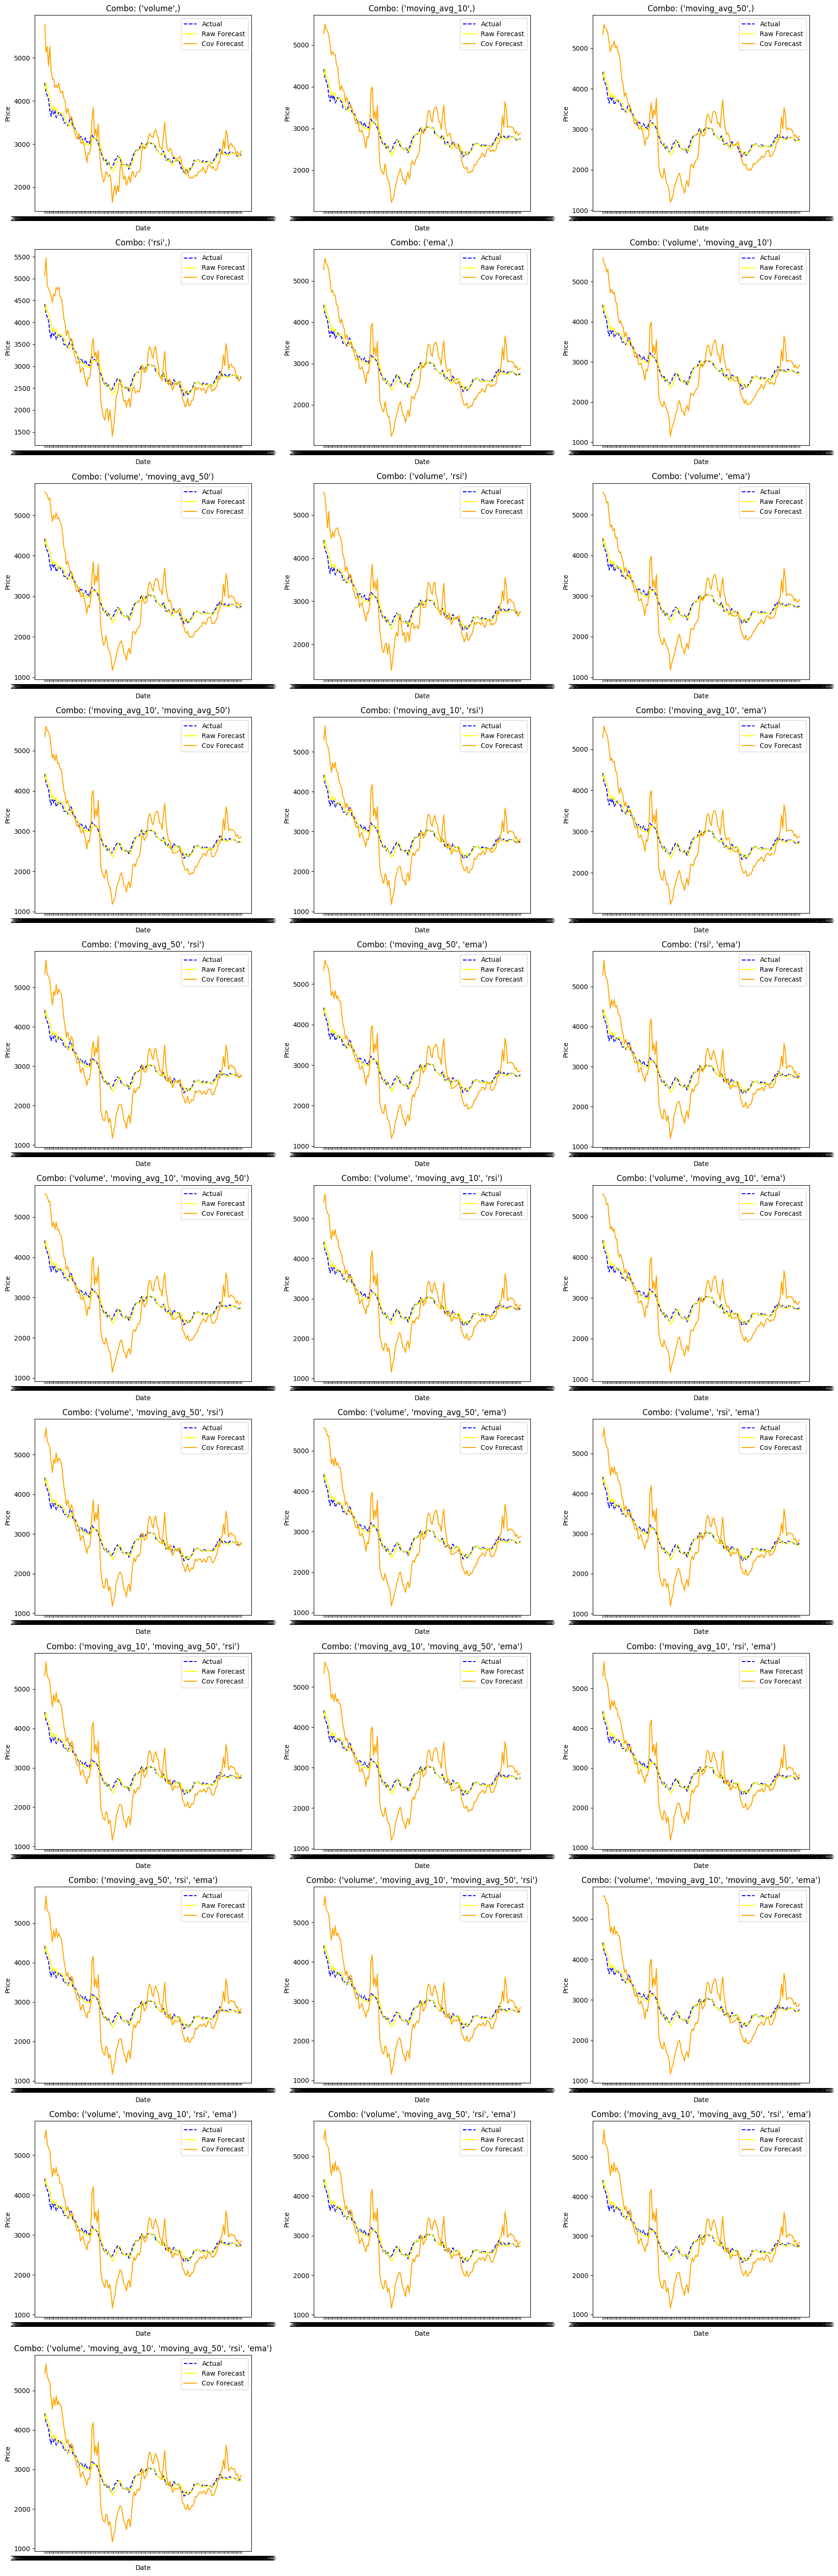

In [51]:
import math

# تعداد سطرها و ستون‌ها برای نمودارها
num_columns = 3
num_combos = len(feature_combinations)
num_rows = math.ceil(num_combos / num_columns)

# ایجاد نمودارهای چندگانه
fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, 5 * num_rows))

# تبدیل axes به یک لیست مسطح برای دسترسی آسان
axes = axes.flatten()

for idx, combo in enumerate(feature_combinations):
    combo_results = results_df[results_df['combo'] == combo]

    axes[idx].plot(combo_results['predict_date'], combo_results['y_actual'], label='Actual', color='blue', linestyle='--')
    axes[idx].plot(combo_results['predict_date'], combo_results['raw_forecast'], label='Raw Forecast', color='yellow')
    axes[idx].plot(combo_results['predict_date'], combo_results['y_predict'], label='Cov Forecast', color='orange')

    axes[idx].set_title(f'Combo: {combo}')
    axes[idx].set_xlabel('Date')
    axes[idx].set_ylabel('Price')
    axes[idx].legend()

# حذف هر subplot خالی
for ax in axes[num_combos:]:
    fig.delaxes(ax)

# تنظیم فاصله بین نمودارها
plt.tight_layout()
plt.show()


In [52]:
 initial_investment = 10000000

In [53]:
import pandas as pd
from sklearn.metrics import mean_squared_error, accuracy_score

def calculate_mse(y_actual, y_forecast):
    return mean_squared_error(y_actual, y_forecast)

# Generalized accuracy function
def calculate_accuracy(y_actual, y_forecast):
    correct_predictions = 0
    total_predictions = 0

    for i in range(1, len(y_actual)):
        actual_today = y_actual.iloc[i]
        predicted_today = y_forecast.iloc[i]
        actual_yesterday = y_actual.iloc[i - 1]
        actual_movement = actual_today - actual_yesterday
        predicted_movement = predicted_today - actual_yesterday
        if actual_movement == 0:
            if predicted_movement != 0:
                total_predictions += 1

        if (actual_movement > 0 and predicted_movement > 0) or (actual_movement < 0 and predicted_movement < 0):
            correct_predictions += 1
        total_predictions += 1
    b=predicted_movement
    return correct_predictions / total_predictions if total_predictions > 0 else 0

# Generalized profit calculation function
def calculate_profit(y_actual, y_forecast):
    capital = initial_investment
    position = 0

    for i in range(1, len(y_actual)):
        today_price = y_actual.iloc[i]
        yesterday_price = y_actual.iloc[i - 1]
        predicted_today_price = y_forecast.iloc[i]

        if predicted_today_price > yesterday_price:
            if position == 0:
                position = capital / yesterday_price
                capital = 0
        elif predicted_today_price < yesterday_price:
            if position > 0:
                capital = position * yesterday_price
                position = 0

    if position > 0:
        capital = position * y_actual.iloc[-1]

    return capital - initial_investment

# Generalized actual direction accuracy function
def calculate_actual_direction_accuracy(y_actual, y_forecast):
    def get_direction(current_price, next_price):
        return 1 if next_price > current_price else 0

    real_directions = []
    predicted_directions = []

    for i in range(1, len(y_actual)):
        real_directions.append(get_direction(y_actual.iloc[i - 1], y_actual.iloc[i]))
        predicted_directions.append(get_direction(y_actual.iloc[i - 1], y_forecast.iloc[i]))


    return accuracy_score(real_directions, predicted_directions)

# Generalized direction accuracy function
def calculate_direction_accuracy(y_actual, y_forecast):
    correct_predictions = 0
    total_predictions = 0

    for i in range(1, len(y_actual)):
        actual_today = y_actual.iloc[i]
        predicted_today = y_forecast.iloc[i]
        actual_yesterday = y_actual.iloc[i - 1]
        predicted_yesterday = y_forecast.iloc[i - 1]
        actual_movement = actual_today - actual_yesterday
        predicted_movement = predicted_today - predicted_yesterday
        if actual_movement == 0:
            if predicted_movement != 0:
                total_predictions += 1

        if (actual_movement > 0 and predicted_movement > 0) or (actual_movement < 0 and predicted_movement < 0):
            correct_predictions += 1
        total_predictions += 1

    return correct_predictions / total_predictions if total_predictions > 0 else 0

# Generalized direction profit calculation function
def calculate_direction_profit(y_actual, y_forecast):
    capital = initial_investment
    position = 0

    for i in range(2, len(y_forecast)):
        yesterday_price = y_actual.iloc[i - 1]
        yesterday_predicted_today_price = y_forecast.iloc[i - 1]
        predicted_today_price = y_forecast.iloc[i]

        if predicted_today_price > yesterday_predicted_today_price:
            if position == 0:
                position = capital / yesterday_price
                capital = 0
        elif predicted_today_price < yesterday_predicted_today_price:
            if position > 0:
                capital = position * yesterday_price
                position = 0

    if position > 0:
        capital = position * y_actual.iloc[-1]

    return capital - initial_investment

def calculate_results_for_combo(combo, context_results_df_actual, context_results_df_predicted):
    # محاسبه مقادیر متریک‌ها
    mse_value = calculate_mse(context_results_df_actual, context_results_df_predicted)
    accuracy_value = calculate_accuracy(context_results_df_actual, context_results_df_predicted)
    profit = calculate_profit(context_results_df_actual, context_results_df_predicted)
    direction_accuracy = calculate_direction_accuracy(context_results_df_actual, context_results_df_predicted)
    actual_direction_accuracy = calculate_actual_direction_accuracy(context_results_df_actual, context_results_df_predicted)
    direction_profit = calculate_direction_profit(context_results_df_actual, context_results_df_predicted)

    # ساخت دیکشنری از نتایج محاسبه شده
    result = {
        'combo': combo,
        'mse': mse_value,
        'accuracy': accuracy_value,
        'direction_accuracy': direction_accuracy,
        'actual_direction_accuracy': actual_direction_accuracy,
        'direction_profit': direction_profit,
        'profit': profit
    }

    return pd.DataFrame([result])

# حالا نتایج را برای هر combo حساب می‌کنیم
final_results = []

for combo in results_df['combo'].unique():
    combo_data_actual = results_df[results_df['combo'] == combo]['y_actual']
    combo_data_predicted = results_df[results_df['combo'] == combo]['y_predict']

    combo_results_df = calculate_results_for_combo(combo, combo_data_actual, combo_data_predicted)
    final_results.append(combo_results_df)

# ترکیب تمام نتایج در یک DataFrame
final_results_df = pd.concat(final_results).reset_index(drop=True)

# نمایش نتایج نهایی

final_results_df

,combo,mse,accuracy,direction_accuracy,actual_direction_accuracy,direction_profit,profit
0,"(volume,)",165686.142695,0.487013,0.493506,0.487013,-2.217614e+06,-3.713032e+06
1,"(moving_avg_10,)",299520.962634,0.493506,0.487013,0.493506,-1.713731e+06,-3.059100e+06
2,"(moving_avg_50,)",399159.285799,0.474026,0.551948,0.474026,-3.934348e+05,-3.925844e+06
3,"(rsi,)",181552.788458,0.454545,0.545455,0.454545,-2.433417e+05,-3.842536e+06
4,"(ema,)",304131.435877,0.487013,0.525974,0.487013,-4.440952e+05,-3.291038e+06
5,"(volume, moving_avg_10)",302293.741895,0.480519,0.500000,0.480519,-1.829066e+06,-3.226514e+06
6,"(volume, moving_avg_50)",387204.195867,0.474026,0.519481,0.474026,-1.629646e+06,-3.925844e+06
7,"(volume, rsi)",193131.316761,0.428571,0.532468,0.428571,-1.282183e+06,-4.221253e+06
8,"(volume, ema)",307530.639444,0.474026,0.538961,0.474026,-9.647198e+05,-3.556759e+06
9,"(moving_avg_10, moving_avg_50)",359092.131426,0.467532,0.545455,0.467532,-3.465863e+05,-3.648569e+06


In [54]:

# پیدا کردن بهترین combo‌ها برای هر معیار
best_mse_combo = final_results_df.loc[final_results_df['mse'].idxmin()]
best_accuracy_combo = final_results_df.loc[final_results_df['accuracy'].idxmax()]
best_profit_combo = final_results_df.loc[final_results_df['profit'].idxmax()]
best_direction_accuracy_combo = final_results_df.loc[final_results_df['direction_accuracy'].idxmax()]
best_actual_direction_accuracy_combo = final_results_df.loc[final_results_df['actual_direction_accuracy'].idxmax()]
best_direction_profit_combo = final_results_df.loc[final_results_df['direction_profit'].idxmax()]

# نمایش بهترین ترکیب‌ها برای هر معیار
print("Best Combinations by Metric:")
print(f"Best MSE Combo: {best_mse_combo['combo']} with MSE: {best_mse_combo['mse']}")
print(f"Best Accuracy Combo: {best_accuracy_combo['combo']} with Accuracy: {best_accuracy_combo['accuracy']}")
print(f"Best Profit Combo: {best_profit_combo['combo']} with Profit: {best_profit_combo['profit']}")
print(f"Best Direction Accuracy Combo: {best_direction_accuracy_combo['combo']} with Direction Accuracy: {best_direction_accuracy_combo['direction_accuracy']}")
print(f"Best Actual Direction Accuracy Combo: {best_actual_direction_accuracy_combo['combo']} with Actual Direction Accuracy: {best_actual_direction_accuracy_combo['actual_direction_accuracy']}")
print(f"Best Direction Profit Combo: {best_direction_profit_combo['combo']} with Direction Profit: {best_direction_profit_combo['direction_profit']}")

Best Combinations by Metric:
Best MSE Combo: ('volume',) with MSE: 165686.14269520267
Best Accuracy Combo: ('moving_avg_10',) with Accuracy: 0.4935064935064935
Best Profit Combo: ('moving_avg_10',) with Profit: -3059099.6590029188
Best Direction Accuracy Combo: ('moving_avg_10', 'rsi', 'ema') with Direction Accuracy: 0.5584415584415584
Best Actual Direction Accuracy Combo: ('moving_avg_10',) with Actual Direction Accuracy: 0.4935064935064935
Best Direction Profit Combo: ('moving_avg_10', 'rsi', 'ema') with Direction Profit: 737340.0483179744


In [55]:
# محاسبه‌ی متریک‌ها برای پیش‌بینی خام (Raw Forecast)
results_df=results_df[results_df['combo'] == combo]
y_actual = results_df['y_actual'].values
raw_forecast = results_df['raw_forecast'].values


# محاسبه متریک‌ها با استفاده از توابع از پیش تعریف شده
mse_value = calculate_mse(pd.Series(y_actual), pd.Series(raw_forecast))
accuracy_value = calculate_accuracy(pd.Series(y_actual), pd.Series(raw_forecast))
profit_value = calculate_profit(pd.Series(y_actual), pd.Series(raw_forecast))
direction_accuracy_value = calculate_direction_accuracy(pd.Series(y_actual), pd.Series(raw_forecast))
actual_direction_accuracy_value = calculate_actual_direction_accuracy(pd.Series(y_actual), pd.Series(raw_forecast))
direction_profit_value = calculate_direction_profit(pd.Series(y_actual), pd.Series(raw_forecast))

# نمایش نتایج محاسباتی
print(f"MSE: {mse_value}")
print(f"Accuracy: {accuracy_value}")
print(f"Profit: {profit_value}")
print(f"Direction Accuracy: {direction_accuracy_value}")
print(f"Actual Direction Accuracy: {actual_direction_accuracy_value}")
print(f"Direction Profit: {direction_profit_value}")


MSE: 7163.823384781806
Accuracy: 0.538961038961039
Profit: -1551123.7504239343
Direction Accuracy: 0.5454545454545454
Actual Direction Accuracy: 0.538961038961039
Direction Profit: 469615.5246651992


In [56]:

    initial_price = results_df['y_actual'].iloc[0]
    final_price = results_df['y_actual'].iloc[-1]

    # Calculate the number of shares bought initially
    shares_bought = initial_investment / initial_price

    # Calculate the final value of the investment
    final_investment_value = shares_bought * final_price

    # Calculate the total profit
    buy_and_hold_profit = final_investment_value - initial_investment
    buy_and_hold_profit

-3753678.9676250853